# Tutorial 6: Hypothesis Testing

### Lecture and Tutorial Learning Goals
From this section, students are expected to be able to:

1.	Give an example of a question you could answer with a hypothesis test.
2.	Identify potential limitations in the data, arising from the methods of data collection, to answer the question
3.	Specify a null and alternative hypothesis.
4.	Given an inferential question, formulate hypotheses to be used in a hypothesis test.
5.	Identify the correct steps and components of a basic hypothesis test.
6.	Write computer scripts to perform hypothesis testing via simulation, randomization and bootstrapping approaches, as well as interpret the output.
7.	Identify the advantages of simulation/randomization tests when estimating parameters different from proportions and means.
8.	Describe the relationship between confidence intervals and hypothesis testing.
9.	Discuss the potential limitations of these methods.

In [1]:
# Run this cell before continuing.
library(cowplot)
library(datateachr)
library(digest)
library(infer)
library(repr)
library(taxyvr)
library(tidyverse)
library(dplyr)
library(datateachr)
penguins <- read.csv("https://raw.githubusercontent.com/allisonhorst/palmerpenguins/master/inst/extdata/penguins.csv")
source("tests_tutorial_06.R")


********************************************************

Note: As of version 1.0.0, cowplot does not change the

  default ggplot2 theme anymore. To recover the previous

  behavior, execute:
  theme_set(theme_cowplot())

********************************************************


Warning message:
“package ‘infer’ was built under R version 4.0.2”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.1     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::

## 1. Annual Maximum Flow Rate of Bow River

&emsp; When the snow melts in spring and summer, tons of water are released into the rivers, and floodings occur. One preventative measure is to keep track of the maximum flow of a river each year. For this question, we aim to prevent flooding by first studying the annual maximum daily discharge (in $m^3/s$) at a hydrometric station called <i> Bow River at Banff </i>, which is near Banff, Alberta. The data are saved to the data table <i>flow_sample</i>. Let's preview this dataset.

In [2]:
?flow_sample

In [3]:
head(flow_sample)

station_id,year,extreme_type,month,day,flow,sym
<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<chr>
05BB001,1909,maximum,7,7,314,NA
05BB001,1910,maximum,6,12,230,NA
05BB001,1911,maximum,6,14,264,NA
05BB001,1912,maximum,8,25,174,NA
05BB001,1913,maximum,6,11,232,NA
05BB001,1914,maximum,6,18,214,NA


A village downstream wants to build a dam to mitigate the effects of annual flooding. To design this dam, we’re interested in studying the distribution of the maximum flow of Bow River at this station. A retired employee, who was monitoring many hydrometric stations in the area, claims that the annual maximum flow is typically around $210 m^3/s$. However, residents in the area claim  that the annual maximum flow is typically higher than $210 m^3/s$.

<b>Question 1.1: Selecting Parameter</b><br>
{points: 2}

Which of the parameters below would be most suitable to investigate and ultimately test the residents’ claim? (Select all that apply)

A. The mean of the annual maximum flow distribution at Bow River

B. The median of the annual maximum flow distribution at Bow River

C. The variance of the annual maximum flow distribution at Bow River

D. The proportion of annual maximum flow values at Bow River exceeding the residents’ claim

_Assign your answer to an object called `answer1.1`. Your answer should be a sequence of characters surrounded by quotes (e.g., "ABCD")._

In [4]:
#answer1.1 <- ""

# your code here
answer1.1 <- "AB"
answer1.1

[1] "AB"

In [5]:
# Here we check to see if you have given your answer the correct object name
# and if your answer is plausible. However, all other tests have been hidden
# so you can practice deciding when you have the correct answer.

test_that('Did not assign answer to an object called "answer1.1"', {
    expect_true(exists("answer1.1"))
  })



&emsp; For now, let us focus on the mean of the annual maximum flow. We want to test hypotheses about the mean <b>at the 5% significance level</b>. Here we assume that the annual maximum flow data originate from a distribution that does not change over the years (due to climate change, tectonic activities, etc).

<b>Question 1.2: Null Hypothesis</b><br>
{points: 2}

Which of the following would be an appropriate null hypothesis for us to set, given the residents’ and retired employee’s claims?

A. $H_0$: The mean of the annual maximum flow at Bow River is equal to $210 m^3/s$.

B. $H_0$: The mean of the annual maximum flow at Bow River is greater than $210 m^3/s$.

C. $H_0$: The mean of the annual maximum flow at Bow River is greater than or equal to $210 m^3/s$.

D. $H_0$: The mean of the annual maximum flow at Bow River is NOT equal to $210 m^3/s$.

Your answer should be a string containing one letter.

_Assign your answer to an object called `answer1.2`. Your answer should be a single character surrounded by quotes._

In [246]:
#answer1.2 <-""

# your code here
answer1.2 <- "A"
answer1.2

[1] "A"

In [247]:
# Here we check to see if you have given your answer the correct object name
# and if your answer is plausible. However, all other tests have been hidden
# so you can practice deciding when you have the correct answer.

test_that('Did not assign answer to an object called "answer1.2"', {
expect_true(exists("answer1.2"))
})



<b>Question 1.3: Alternative Hypothesis </b><br>
{points: 2}

Which of the following would be an appropriate alternative hypothesis for us to set, given the residents’ and retired employee’s claims?

A. $H_1$: The mean of the annual maximum flow at Bow River is less than $210 m^3/s$.

B. $H_1$: The mean of the annual maximum flow at Bow River is greater than $210 m^3/s$.

C. $H_1$: The mean of the annual maximum flow at Bow River is greater than or equal to $210 m^3/s$.

D. $H_1$: The mean of the annual maximum flow at Bow River is <b>NOT</b> equal to $210 m^3/s$.

Your answer should be a string containing one letter.

_Assign your answer to an object called `answer1.3`. Your answer should be a single character surrounded by quotes._

In [248]:
#answer1.3 <-""

# your code here
answer1.3 <- "B"
answer1.3

[1] "B"

In [249]:
# Here we check to see if you have given your answer the correct object name
# and if your answer is plausible. However, all other tests have been hidden
# so you can practice deciding when you have the correct answer.


test_that('Did not assign answer to an object called "answer1.3"', {
    expect_true(exists("answer1.3"))
})


&emsp; Now we select the maximum flow, keep only the year and the flow columns. We also find the sample size.

In [250]:
# Run this code before continuing
max_flow_sample <- 
    flow_sample %>%
    filter(extreme_type == 'maximum') %>%
    select(year, flow) %>% 
    rename(maximum_flow = flow)

head(max_flow_sample)


year,maximum_flow
<dbl>,<dbl>
1909,314
1910,230
1911,264
1912,174
1913,232
1914,214


<b> Question 1.4</b> <br>
{points: 3}

Calculate the observed test statistic from `max_flow_sample` with the `infer` package, specify the response, and use the `calculate` function. Leave your answer as a 1x1 tibble with a column named `stat`.

_Assign your data frame to an object called `observed_mean`. Your data frame should have only one column, `stat`, and one row._

In [251]:
#observed_mean <-

# your code here
observed_mean <- 
    max_flow_sample %>% 
    specify(response= maximum_flow) %>%
    calculate(stat ="mean")
observed_mean

stat
<dbl>
212.0734


In [252]:
# Here we check to see if you have given your answer the correct object name
# and if your answer is plausible. However, all other tests have been hidden
# so you can practice deciding when you have the correct answer.

test_that('Did not assign answer to an object called "observed_mean"', {
    expect_true(exists("observed_mean"))
})

test_that("Solution should be a data frame", {
    expect_true("data.frame" %in% class(observed_mean))
})



<b>Question 1.5: Simulating from the null distribution</b> <br>
{points: 3}

Using the `infer` workflow, generate 1000 samples from the null distribution. Remember the steps:

1. `specify` the response;
2. `hypothesize`;
3. `generate` 1000 samples; 
4. and `calculate` the mean of each sample. 

_Assign your data frame to an object called `null_max_flow`. Your data frame should have two columns: `replicate` and  `stat`._

In [253]:
set.seed(1432) # Do not change this

#null_max_flow <-

# your code here
null_max_flow <-max_flow_sample %>%
    specify(response=maximum_flow) %>%
    hypothesize(null="point", mu=210) %>%
    generate(reps= 1000, type="bootstrap") %>%
    calculate(stat="mean")
head(null_max_flow)
#nrow(max_flow_sample)

replicate,stat
<int>,<dbl>
1,217.2110
2,206.6881
3,211.5505
4,218.8899
5,210.8899
6,212.7890


In [254]:
# Here we check to see if you have given your answer the correct object name
# and if your answer is plausible. However, all other tests have been hidden
# so you can practice deciding when you have the correct answer.


test_that('Did not assign answer to an object called "null_max_flow"', {
    expect_true(exists("null_max_flow"))
  })

  test_that("Solution should be a data frame", {
    expect_true("data.frame" %in% class(null_max_flow))
  })



<b>Question 1.6</b><br>
{points: 3}

Plot the result of the hypothesis test using `visualize` with 10 bins, put a vertical bar for the observed test statistic, and shade the tail(s). Label the x-axis as `Mean`.

```r
max_flow_result_plot <- 
    null_max_flow %>% 
    visualize(bins = ...) + 
    shade_p_value(obs_stat = ..., direction = ...) +
    xlab(...)
```

<i>Assign your answer to an object called </i>`max_flow_result_plot`.

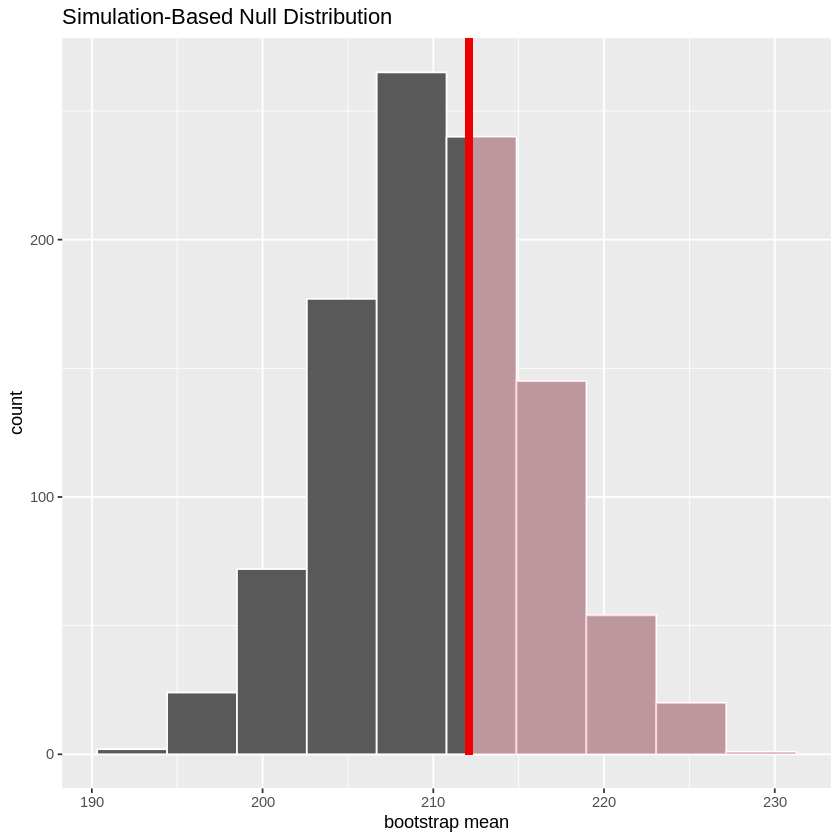

In [256]:
#max_flow_result_plot <-

# your code here
max_flow_result_plot <- 
    null_max_flow %>%
    visualize(bins=10)+
    xlab("bootstrap mean")+
    shade_p_value(obs_stat= observed_mean, direction="right")
max_flow_result_plot

In [257]:
test_1.6()

[1] "Success!"


<b>Question 1.7</b><br>
{points: 3}

Use the `get_p_value` function from `infer` package to get the p-value from `null_max_flow`. 

```r
answer1.7 <- 
    ... %>% 
    get_p_value(obs_stat = ..., direction = ...)
```
<i>Assign your answer to an object called </i>`answer1.7`.

In [258]:
#answer1.7 <-

# your code here
answer1.7 <- null_max_flow %>%
    get_p_value(obs_stat=observed_mean, direction="right")
answer1.7

p_value
<dbl>
0.369


In [259]:
test_1.7()

[1] "Success!"


<b>Question 1.8: Conclusion of the test </b><br>
{points: 3}

What can we conclude based on the result of the hypothesis test?

A. Given a p-value of 0.369 we do not reject the null hypothesis.

B. Given a p-value of 0.369 we reject the null hypothesis.

C. Given a p-value of 0.369 we do not reject the null hypothesis at the 5% significance level.

D. Given a p-value of 0.369 we reject the null hypothesis at the 5% significance level.

_Assign your answer to an object called `answer1.8`. Your response should be a single character surrounded by quotes._

In [260]:
#answer1.8 <-

# your code here
answer1.8 <- "C"
answer1.8

[1] "C"

In [261]:
# Here we check to see if you have given your answer the correct object name
# and if your answer is plausible. However, all other tests have been hidden
# so you can practice deciding when you have the correct answer.

test_that('Did not assign answer to an object called "answer1.8"', {
    expect_true(exists("answer1.8"))
})

test_that('Solution should be a single character ("A", "B", "C", or "D")', {
    expect_match(answer1.8, "a|b|c|d", ignore.case = TRUE)
})



<b>Question 1.9: Conclusion at a different significance level</b>

{Points: 3}

If we conducted the test at the 10% significance level instead, would our conclusion have been different?

A. Yes, it would have, the null hypothesis would be rejected.

B. Yes, it would have, the null hypothesis would be accepted.

C. Yes, it would have, the null hypothesis would NOT be rejected.

D. No, it wouldn’t.

Your answer should be a string containing one letter.

_Assign your answer to an object called `answer1.9`. Your answer should be a single character surrounded by quotes._

In [262]:
#answer1.9 <-

# your code here
answer1.9 <- "D"
answer1.9

[1] "D"

In [263]:
test_1.9()

[1] "Success!"


<b> Question 1.10</b> <br>
{points: 3}

Now we would like to find the 90% confidence interval for the mean. First, let's find the bootstrap distribution for the mean by generating 1000 samples. Use the `infer` package and `max_flow_sample` to specify the response, generate 1000 samples, and calculate the mean. 


_Assign your data frame to an object called `mean_max_bootstrap_dist`. Your data frame should have two columns: `replicate` and  `stat`._

In [264]:
set.seed(6882) # Do not change this

#mean_max_bootstrap_dist <-

# your code here
mean_max_bootstrap_dist <- max_flow_sample %>%
    specify(response=maximum_flow)%>%
    generate(reps=1000, type="bootstrap")%>%
    calculate(stat="mean")
#head(max_flow_sample)    

head(mean_max_bootstrap_dist)

replicate,stat
<int>,<dbl>
1,203.6972
2,205.9633
3,205.3853
4,226.7706
5,203.5413
6,216.7615


In [265]:
test_1.10()

[1] "Success!"


<b> Question 1.11 </b> <br>
{points: 2}

Using the boostrap distribution `mean_max_bootstrap_dist`, find the 90% confidence interval given by the 0.1-quantile and 1-quantile (max). 

```r
mean_max_flow_ci <- 
    ... %>% 
    summarise(lower_ci = ..., upper_ci = ...)
```

_Assign your data frame to an object called `mean_max_flow_ci`. Your data frame should have two columns: `lower_ci` and  `upper_ci`._

In [266]:
# mean_max_flow_ci <-

# your code here
mean_max_flow_ci <- mean_max_bootstrap_dist %>%
    summarize(lower_ci=quantile(stat,0.1), upper_ci=quantile(stat,1))
    
mean_max_flow_ci

lower_ci,upper_ci
<dbl>,<dbl>
203.8798,232.1743


In [267]:
test_1.11()

[1] "Success!"


<b> Question 1.12 </b> <br>
{points: 2}

Using the `infer` package, visualize the confidence interval `mean_max_flow_ci` with the bootstrap distribution `mean_max_bootstrap_dist`.

<i>Assign your plot to an object called </i>`mean_flow_ci_plot`.

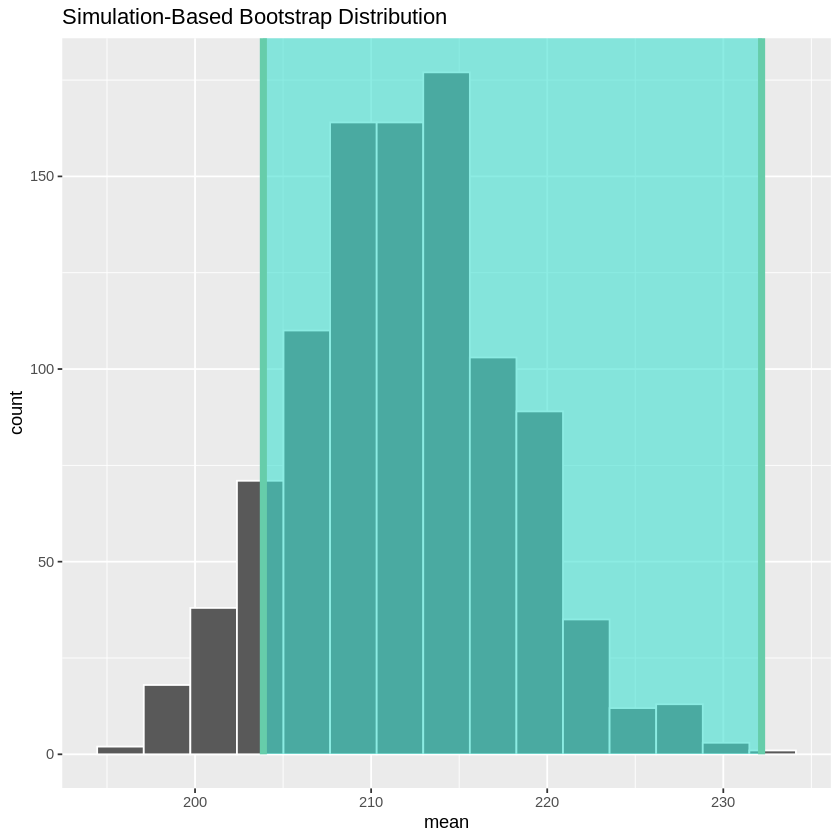

In [268]:
# mean_flow_ci_plot <- 

# your code here
mean_flow_ci_plot <- mean_max_bootstrap_dist %>%
    visualize() +
    xlab("mean")+
    shade_confidence_interval(endpoints = mean_max_flow_ci)
mean_flow_ci_plot

In [269]:
test_1.12()

[1] "Success!"


## 2.  Flipper Lengths of Penguins

The dataset `penguins` contains size measurements for adult foraging penguins near Palmer Station, Antarctica. First, let's take a look at the first few rows of this dataset.

In [270]:
head(penguins)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
,<chr>,<chr>,<dbl>,<dbl>,<int>,<int>,<chr>,<int>
1,Adelie,Torgersen,39.1,18.7,181,3750,male,2007
2,Adelie,Torgersen,39.5,17.4,186,3800,female,2007
3,Adelie,Torgersen,40.3,18.0,195,3250,female,2007
4,Adelie,Torgersen,NA,NA,NA,NA,NA,2007
5,Adelie,Torgersen,36.7,19.3,193,3450,female,2007
6,Adelie,Torgersen,39.3,20.6,190,3650,male,2007


&emsp; We want to study how Adelie and Chinstrap penguins are different. First, we study their flipper lengths (in mm).

<b> Question 2.1: Pre-processing</b> <br>
{points: 2}

Filter the `penguins` dataset to remove all rows with `NA` in `flipper_length_mm`, keep only the `Adelie` and `Chinstrap` species, and select the two columns `species` and `flipper_length_mm`.

_Assign your data frame to an object called `adelie_chinstrap_flipper`. Your data frame should have only two columns, `species` and `flipper_length_mm`._ 

In [272]:
#adelie_chinstrap_flipper <-

# your code here
adelie_chinstrap_flipper <- penguins %>%
    filter(!is.na(flipper_length_mm), species=="Adelie" | species=="Chinstrap") %>%
    select(species, flipper_length_mm)
    
head(adelie_chinstrap_flipper)

,species,flipper_length_mm
,<chr>,<int>
1,Adelie,181
2,Adelie,186
3,Adelie,195
4,Adelie,193
5,Adelie,190
6,Adelie,181


In [273]:
test_2.1()

[1] "Success!"


<b>Question 2.2: Null hypothesis</b> <br>
{points: 2}

&emsp; An ecologist suspects that flipper lengths affect their ability to swim. But are the flipper lengths different between the species? Looking at photos of the two penguin species, some claim that their flippers are generally the same length. However, an ecologist hypothesizes that they may not be the same length. To study the distributions of the flipper lengths of the two species, let's conduct a hypothesis test to examine their <b> difference in medians</b>.

Which of the following would be an appropriate null hypothesis for us to set, given the above situation?

A. $H_0$: The median flipper length of the Adelie penguins is the same as the median flipper length of the Chinstrap penguins.

B. $H_0$: The mean flipper length of the Adelie penguins is the same as the mean flipper length of the Chinstrap penguins.

C. $H_0$: The median flipper length of the Adelie penguins is different from the median flipper length of the Chinstrap penguins.

D. $H_0$: The median flipper length of the Adelie penguins is greater than the median flipper length of the Chinstrap penguins.

Your answer should be a string containing one letter.

_Assign your answer to an object called `answer2.2`. Your answer should be a single character surrounded by quotes._

In [274]:
#answer2.2 <-

# your code here
answer2.2 <- "A"
answer2.2

[1] "A"

In [94]:
# Here we check to see if you have given your answer the correct object name
# and if your answer is plausible. However, all other tests have been hidden
# so you can practice deciding when you have the correct answer.

test_that('Did not assign answer to an object called "answer2.2"', {
    expect_true(exists("answer2.2"))
})

test_that('Solution should be a single character ("A", "B", "C", or "D")', {
    expect_match(answer2.2, "a|b|c|d", ignore.case = TRUE)
})


<b>Question 2.3: Alternative Hypothesis</b><br>
{points: 2}

Which of the following would be an appropriate alternative hypothesis for us to set, given the above situation?

A. $H_1$: The median flipper length of the Adelie penguins is the same as the median flipper length of the Chinstrap penguins.

B. $H_1$: The mean flipper length of the Adelie penguins is different from the mean flipper length of the Chinstrap penguins.

C. $H_1$: The median flipper length of the Adelie penguins is different from the median flipper length of the Chinstrap penguins.

D. $H_1$: The median flipper length of the Adelie penguins is less than the median flipper length of the Chinstrap penguins.

Your answer should be a string containing one letter.

_Assign your answer to an object called `answer2.3`. Your answer should be a single character surrounded by quotes._

In [275]:
#answer2.3 <-

# your code here
answer2.3 <- "C"
answer2.3

[1] "C"

In [276]:
# Here we check to see if you have given your answer the correct object name
# and if your answer is plausible. However, all other tests have been hidden
# so you can practice deciding when you have the correct answer.

test_that('Did not assign answer to an object called "answer2.3"', {
    expect_true(exists("answer2.3"))
})

test_that('Solution should be a single character ("A", "B", "C", or "D")', {
    expect_match(answer2.3, "a|b|c|d", ignore.case = TRUE)
})


<b> Question 2.4 </b> <br>
{points: 2}

Count the numbers of Adelie penguins and Chinstrap penguins examined in `adelie_chinstrap_flipper`.

```r
penguin_count <-
    ... %>% 
    count(...)
```

_Assign your data frame to an object called `penguin_count`. Your data frame should have only two columns: `species` and `n`._

In [277]:
# penguin_count <-

# your code here
penguin_count <- adelie_chinstrap_flipper %>%
    count(species)
penguin_count

species,n
<chr>,<int>
Adelie,151
Chinstrap,68


In [278]:
test_2.4()

[1] "Success!"


<b> Question 2.5</b><br>
{points: 3}

Calculate the observed test statistic with the `infer` package. Use `adelie_chinstrap_flipper` to specify the response and explanatory variables, and calculate Adelie's median minus Chinstrap's median. 

_Assign your data frame to an object called `observed_diff_in_medians`. Your data frame should have only one column, `stat`, and one row._

In [279]:
#obs_diff_in_medians <- 

# your code here
obs_diff_in_medians <- 
    adelie_chinstrap_flipper %>%
    specify(formula= flipper_length_mm ~species) %>%
    calculate(stat="diff in medians")
obs_diff_in_medians

Warning message:
“The statistic is based on a difference or ratio; by default, for difference-based statistics, the explanatory variable is subtracted in the order "Adelie" - "Chinstrap", or divided in the order "Adelie" / "Chinstrap" for ratio-based statistics. To specify this order yourself, supply `order = c("Adelie", "Chinstrap")` to the calculate() function.”


stat
<dbl>
-6


In [280]:
test_2.5()

[1] "Success!"


<b>Question 2.6: Simulating from the null distribution</b> <br>
{points: 3}

Using the `infer` package, generate 1000 samples from the null distribution. Use `adelie_chinstrap_flipper` to specify the response and explanatory variables, hypothesize, generate 1000 samples and calculate Adelie's median minus Chinstrap's median.

_Assign your data frame to an object called `null_diff_in_medians`. Your data frame should have only two columns: `replicate` and `stat`._

In [281]:
set.seed(5437) # Do not change this

#null_diff_in_medians <-

# your code here
null_diff_in_medians <- 
    adelie_chinstrap_flipper %>%
    specify(formula= flipper_length_mm ~species) %>%
    hypothesise(null="independence")%>%
    generate(reps=1000, type="permute")%>%
    calculate(stat="diff in medians")
head(null_diff_in_medians)

Warning message:
“The statistic is based on a difference or ratio; by default, for difference-based statistics, the explanatory variable is subtracted in the order "Adelie" - "Chinstrap", or divided in the order "Adelie" / "Chinstrap" for ratio-based statistics. To specify this order yourself, supply `order = c("Adelie", "Chinstrap")` to the calculate() function.”


replicate,stat
<int>,<dbl>
1,-3.0
2,2.0
3,-1.0
4,2.0
5,-0.5
6,3.0


In [282]:
test_2.6()

[1] "Success!"


<b>Question 2.7</b> <br>
{points: 3}

Plot the result of the hypothesis test with `visualize` with 10 bins, put a vertical bar for the observed test statistic `obs_diff_in_medians`, and shade the tail(s).

_Assign your plot to an object called `diff_in_medians_plot`._

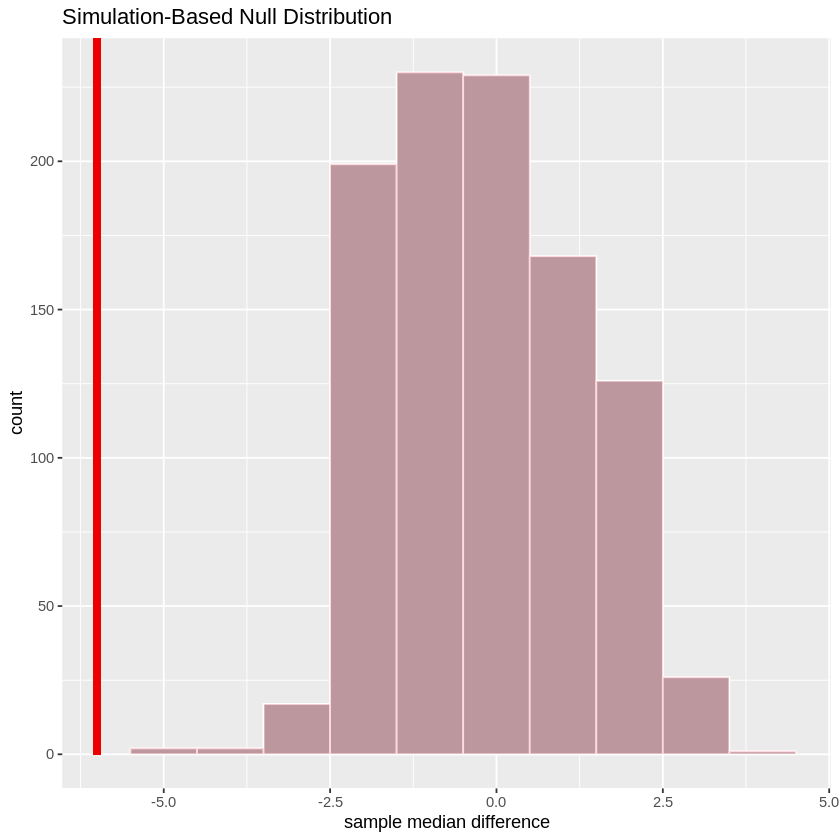

In [283]:
#diff_in_medians_plot <-

# your code here
diff_in_medians_plot <- 
    null_diff_in_medians %>%
    visualize(bins=10) +
    xlab("sample median difference")+
    shade_p_value(obs_stat = obs_diff_in_medians, direction = "right")

diff_in_medians_plot

In [284]:
test_2.7()

[1] "Success!"


<b>Question 2.8</b> <br>
{points: 3}

Obtain the p-value of `obs_diff_in_medians` from `null_diff_in_medians`. Leave your answer as a $1 \times 1$ tibble with column name `p_value`.

_Assign your data frame to an object called `answer2`. Your data frame should have only one column: `p_value`._

In [285]:
#answer2.8 <-

# your code here
answer2.8 <- null_diff_in_medians %>% 
    get_p_value(obs_stat = obs_diff_in_medians, direction = "two_sided")# %>% as.numeric()
answer2.8

Warning message:
“Please be cautious in reporting a p-value of 0. This result is an approximation based on the number of `reps` chosen in the `generate()` step. See `?get_p_value()` for more information.”


p_value
<dbl>
0


In [286]:
test_2.8()

[1] "Success!"


<b> Question 2.9 </b> <br>
{points: 2}

We should never report a p-value of 0 because this suggests that making a Type I error is impossible. But this is too bold of a claim to make.

What would be the best way to report the p-value? Think about what the next smallest p-value is possible to be calculated, given that we are using 1000 repetitions to calculate the sample.

A. The p-value is < 0.05

B. The p-value is < 0.01

C. The p-value is < 0.001

D. The p-value is < 0.0001


_Assign you answer to an object called `answer2.9`. Your answer should be a string containing one letter._

In [287]:
#answer2.9 <-

# your code here
answer2.9 <- "C"
answer2.9

[1] "C"

In [288]:
test_2.9()

[1] "Success!"


<b> Question 2.10: Conclusion of the test </b> <br>
{points: 3}

What can we conclude based on the result of the hypothesis test?

A. Given a p-value < 0.001 we reject the null hypothesis.

B. Given a p-value < 0.001 we accept the alternative hypothesis at the 5% significance level.

C. Given a p-value < 0.001 we do not reject the null hypothesis at the 5% significance level.

D. Given a p-value < 0.001 we reject the null hypothesis at the 5% significance level.


_Assign your answer to an object called `answer2.10`. Your answer should be a string containing one letter._

In [289]:
#answer2.10 <-

# your code here
answer2.10 <- "D"
answer2.10

[1] "D"

In [290]:
# Here we check to see if you have given your answer the correct object name
# and if your answer is plausible. However, all other tests have been hidden
# so you can practice deciding when you have the correct answer.

test_that('Did not assign answer to an object called "answer2.10"', {
    expect_true(exists("answer2.10"))
})

test_that('Solution should be a single character ("A", "B", "C", or "D")', {
    expect_match(answer2.10, "a|b|c|d", ignore.case = TRUE)
})



<b> Question 2.11</b><br>
{points: 3}

Now we would like to find the 90% confidence interval for the difference in median. First, let's find the bootstrap distribution for the difference in medians with the `infer` package. Use `diff_in_medians_bootstrap_dist` to specify the response and explanatory variables, generate 1000 samples, and calculate Adelie's median minus Chinstrap's median. 

_Assign your data frame to an object called `diff_in_medians_bootstrap_dist`. Your data frame should have only two columns: `replicate` and `stat`._

In [291]:
set.seed(9263) # Do not change this

#diff_in_medians_bootstrap_dist <-

# your code here
diff_in_medians_bootstrap_dist <- adelie_chinstrap_flipper %>%
    specify(formula= flipper_length_mm ~species) %>%
    #hypothesise(null="independence")%>%
    generate(reps=1000, type="bootstrap")%>%
    calculate(stat="diff in medians")
head(diff_in_medians_bootstrap_dist)

Warning message:
“The statistic is based on a difference or ratio; by default, for difference-based statistics, the explanatory variable is subtracted in the order "Adelie" - "Chinstrap", or divided in the order "Adelie" / "Chinstrap" for ratio-based statistics. To specify this order yourself, supply `order = c("Adelie", "Chinstrap")` to the calculate() function.”


replicate,stat
<int>,<dbl>
1,-6.0
2,-5.5
3,-6.0
4,-5.0
5,-6.0
6,-6.0


In [292]:
test_2.11()

[1] "Success!"


<b> Question 2.12 </b><br>
{points: 2}

Use `diff_in_medians_bootstrap_dist` to find the 90% confidence interval.

_Assign your data frame to an object called `diff_in_medians_ci`. Your data frame should have two columns: `lower_ci` and  `upper_ci`._

In [295]:
#diff_in_medians_ci <-

# your code here
diff_in_medians_ci <- diff_in_medians_bootstrap_dist %>% 
    #specify(response = stat) %>%
    get_confidence_interval(level = 0.9, type = "percentile")
    
diff_in_medians_ci

lower_ci,upper_ci
<dbl>,<dbl>
-7,-4


In [296]:
# Here we check to see if you have given your answer the correct object name
# and if your answer is plausible. However, all other tests have been hidden
# so you can practice deciding when you have the correct answer.

test_that('Did not assign answer to an object called "diff_in_medians_ci"', {
expect_true(exists("diff_in_medians_ci"))
})

test_that("Solution should be a data frame", {
expect_true("data.frame" %in% class(diff_in_medians_ci))
})

expected_colnames <- c("lower_ci", "upper_ci")
given_colnames <- colnames(diff_in_medians_ci)
test_that("Data frame does not have the correct columns", {
    expect_equal(length(setdiff(
      union(expected_colnames, given_colnames),
      intersect(expected_colnames, given_colnames)
    )), 0)
})


<b> Question 2.13 </b><br>
{points: 2}

Visualize the confidence interval `diff_in_medians_ci` with the bootstrap distribution `diff_in_medians_bootstrap_dist`.

<i>Assign your plot to an object called </i>`diff_in_medians_ci_plot`.

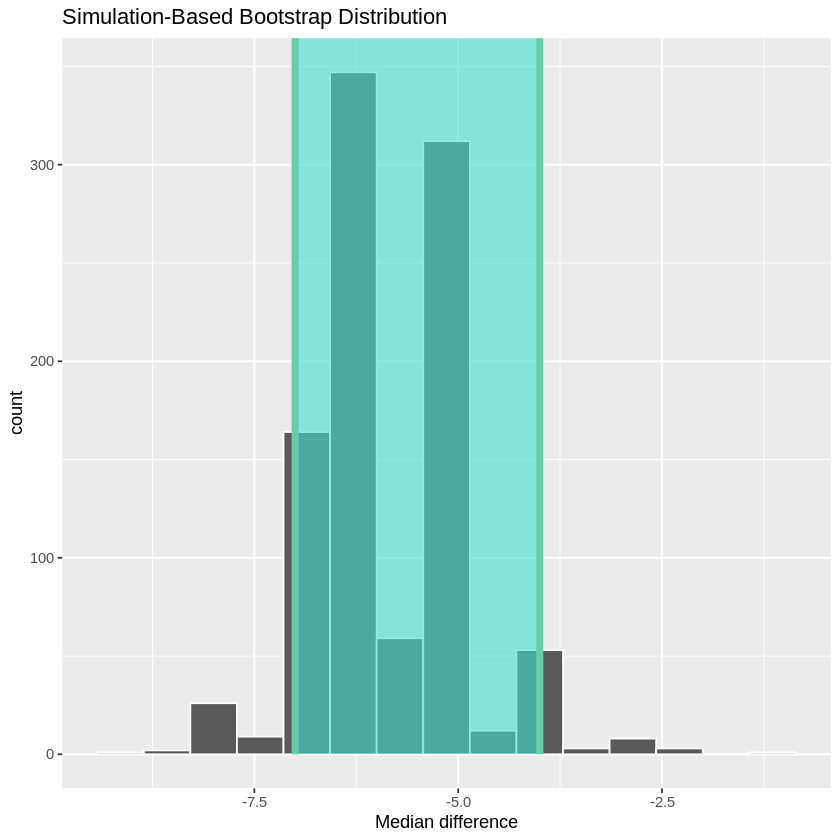

In [297]:
# diff_in_medians_ci_plot <-

# your code here
diff_in_medians_ci_plot <- 
    diff_in_medians_bootstrap_dist %>%
    visualize() +
    xlab("Median difference")+
    shade_confidence_interval(endpoints = diff_in_medians_ci)

    
diff_in_medians_ci_plot

In [298]:
test_2.13()

[1] "Success!"


## 3. Breast Cancer and Radiation Therapy

&emsp; For this question, we will use the dataset found at https://archive.ics.uci.edu/ml/datasets/Breast+Cancer. The dataset contains information on 286 breast cancer patients, including variables on tumour size, tumour location, radiation therapy, cancer recurrence, and other basic medical history data. Given this dataset, we want to investigate whether there is a significant difference in the proportions of cancer recurrence between patients who were treated with experimental radiation therapy and patients who were not (i.e. received an alternate treatment). We will assume that the patients have been randomized into each of these two treatment groups.

&emsp; Let's load this dataset. Note that the "irradiat" column indicates whether or not the patient received radiation therapy, while the "Class" column indicates whether or not the patient experienced a cancer recurrence event.

In [299]:
breast_cancer <- read.csv(url("https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer/breast-cancer.data"),header=FALSE)
colnames(breast_cancer) <- c("class", "age", "menopause", "tumor-size", "inv-nodes", "node-caps", "deg-malig", "breast", "breast-quad", "irradiat")
head(breast_cancer)

,class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>
1,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
3,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
4,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
5,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no
6,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,left,left_low,no


In [173]:
recurrence_irradiat <- 
    breast_cancer %>%
    select(class, irradiat)

head(recurrence_irradiat)

,class,irradiat
,<chr>,<chr>
1,no-recurrence-events,no
2,no-recurrence-events,no
3,no-recurrence-events,no
4,no-recurrence-events,no
5,no-recurrence-events,no
6,no-recurrence-events,no


&emsp; Let's group by `class` and `irradiat` and tally how many samples are in each group.

In [174]:
recurrence_irradiat %>%
    group_by(irradiat, class) %>%
    tally() %>%
    spread(irradiat, n)

class,no,yes
<chr>,<int>,<int>
no-recurrence-events,164,37
recurrence-events,54,31


<b>Question 3.1</b><br>
{points: 3}

Let $p_{1}$ be the proportion of radiation therapy patients (irradiat=true) that subsequently experienced cancer recurrence, and let $p_{2}$ be the proportion of patients that did not receive radiation therapy (irradiat=false) and subsequently experienced cancer recurrence. 

We want to test $$H_0: p_{1} = p_{2},$$ and $$H_a: p_{1} \neq p_{2}.$$

Calculate the observed test statistic $\hat{p}_1 - \hat{p}_2$ using `recurrence_irradiat` by first specifying the response and explanatory variables.

_Assign your data frame to an object called `obs_diff_prop`. Your data frame should have only one column, `stat`, and one row._

In [304]:
#obs_diff_prop <- 

# your code here
obs_diff_prop <- recurrence_irradiat %>%
    specify(formula = class ~ irradiat, success = "recurrence-events")%>%
    #hypothesize(null = "independence") %>% 
    #generate(reps = 1000, type = "permute") %>% 
    calculate(stat = "diff in props", order = c("yes", "no"))
    
obs_diff_prop 

stat
<dbl>
0.2081759


In [305]:
test_3.1()

[1] "Success!"


<b>Question 3.2: Null Distribution</b><br>
{points: 3}

Generate 1000 samples from the null distribution. Use `recurrence_irradiat` to specify the response and explanatory variables, hypothesize, generate 1000 samples and calculate the proportion of irradiated patients having recurrent cancer minus the proportion of non-irradiated patients having recurrent cancer. 

_Assign your data frame to an object called `irradiat_null_distribution`. Your data frame should have only two columns: `replicate` and `stat`._

In [306]:
set.seed(3526)
#irradiat_null_distribution <-

# your code here
irradiat_null_distribution <- recurrence_irradiat %>% 
    specify(formula = class~ irradiat, success = "recurrence-events")%>%
    hypothesize(null = "independence") %>% 
    generate(reps = 1000, type = "permute") %>% 
    calculate(stat = "diff in props", order = c("yes", "no"))
    
head(irradiat_null_distribution)

replicate,stat
<int>,<dbl>
1,-0.08121964
2,0.15029682
3,0.05383162
4,0.03453859
5,-0.06192661
6,0.01524555


In [307]:
test_3.2()

[1] "Success!"


<b>Question 3.3</b><br>
{points: 3}

Plot the result of the hypothesis test using `visualize` with 10 bins, put a vertical bar for the observed test statistic `obs_diff_prop`, and shade the tail(s).

<i>Assign your answer to an object called </i>`irradiate_result_plot`.

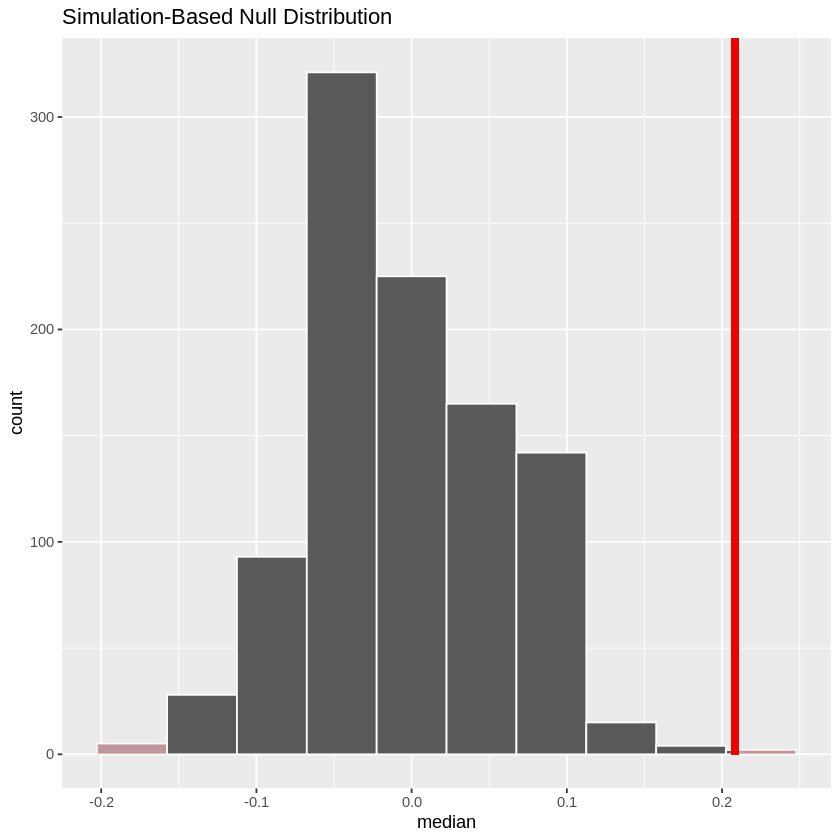

In [308]:
#irradiate_result_plot <-

# your code here
irradiate_result_plot<- irradiat_null_distribution %>%
    visualize(bins=10) +
    shade_p_value(obs_stat = obs_diff_prop, direction = "two sided")+
    xlab("median")
irradiate_result_plot 

In [309]:
test_3.3()

[1] "Success!"


<b>Question 3.4: Calculate p-value</b> <br>
{points: 3}

Obtain the p-value from `irradiat_null_distribution`. Leave your answer as a $1 \times 1$ tibble with column name `p_value`.

<i>Assign your answer to an object called </i>`answer3.4`.

In [310]:
#answer3.4<-

# your code here
answer3.4 <- irradiat_null_distribution %>% 
  get_p_value(obs_stat = obs_diff_prop, direction = "two-sided")
answer3.4

p_value
<dbl>
0.004


In [311]:
# Here we check to see if you have given your answer the correct object name
# and if your answer is plausible. However, all other tests have been hidden
# so you can practice deciding when you have the correct answer.

test_that('Did not assign answer to an object called "answer3.4"', {
    expect_true(exists("answer3.4"))
  })

  test_that("Solution should be a data frame", {
    expect_true("data.frame" %in% class(answer3.4))
  })

expected_colnames <- c("p_value")
given_colnames <- colnames(answer3.4)
test_that("Data frame does not have the correct columns", {
    expect_equal(length(setdiff(
      union(expected_colnames, given_colnames),
      intersect(expected_colnames, given_colnames)
    )), 0)
})


&emsp; Thus, given the p-value above, we reject the null hypothesis at 5% significance level.

&emsp; Given this result and the test statistic that we observed in Question 3.1, there is evidence to suggest that cancer recurrence is associated with the type of treatment received. Specifically, patients who received the experimental radiation therapy may be more likely to experience cancer recurrence than patients who did not. This may be attributable to its lower effectiveness at eliminating the cancer present, compared to alternative treatments.